# Temperature increase in Canada
### Group 42 - Project Proposal
Group Members: Abner Bal, Jin-Shiang Hu, Laura Luo, Vicki Zhang
## Introduction
Global warming has been a large issue in discussion for the past few decades, as it affects a variety of sectors, such as agriculture, wildlife, and human health. Research done by Alexander et al. states that over the past decades, the northern countries have experienced the fastest increasing temperatures on Earth. Another study by Vincent et al. studies the specific correlations to the increasing temperature in Canada, which includes an increase in specific humidity and air moisture content. This study will serve as a framework for our report, we plan on conducting an analysis of the average temperature specifically in Canada, to observe a potential changing relationship as time passes. We will be using a dataset from Kaggle, titled: Temperature of All Countries (1995-2020), the most relevant columns for our analysis will be Country, Month, Day, Year, and AvgTemperature columns. The scale parameter that would be useful for our analysis is the standard deviation of temperature, which will help determine if the change in temperature over time is indeed not just due to the natural variation in temperature. 

## Method and Results

### Preliminary Result -- Data Visualization

In [20]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [21]:
temp_canada <- read_csv("city_temperature.csv")|>
filter(Country == "Canada") |>
mutate(m = case_when(Month == 1 ~ "January",
                     Month == 2 ~ "Febuary",
                     Month == 3 ~ "March",
                     Month == 4 ~ "April",
                     Month == 5 ~ "May",
                     Month == 6 ~ "June",
                     Month == 7 ~ "July",
                     Month == 8 ~ "August",
                     Month == 9 ~ "September",
                     Month == 10 ~ "October",
                     Month == 11 ~ "November",
                     Month == 12 ~ "December"))  
head(temp_canada)

Rows: 1285976 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Region, Country, City
dbl (4): Month, Day, Year, AvgTemperature
lgl (1): State

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Region,Country,State,City,Month,Day,Year,AvgTemperature,m
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
North America,Canada,NA,Calgary,1,1,1995,12.6,January
North America,Canada,NA,Calgary,1,2,1995,4.5,January
North America,Canada,NA,Calgary,1,3,1995,2.5,January
North America,Canada,NA,Calgary,1,4,1995,11.4,January
North America,Canada,NA,Calgary,1,5,1995,11.3,January
North America,Canada,NA,Calgary,1,6,1995,4.0,January


In [22]:
temp_canada <- temp_canada |>
select(City, Month, Day, Year, AvgTemperature) 
write.csv(temp_canada, "canada_temperature.csv", row.names=FALSE)

In [23]:
temp_quebec <- read_csv("canada_temperature.csv")|>
filter(City == "Quebec")
head(temp_quebec)

Rows: 74245 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): City
dbl (4): Month, Day, Year, AvgTemperature

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


City,Month,Day,Year,AvgTemperature
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Quebec,1,1,1995,18.0
Quebec,1,2,1995,21.7
Quebec,1,3,1995,14.5
Quebec,1,4,1995,13.2
Quebec,1,5,1995,-1.1
Quebec,1,6,1995,20.3


### Part 1: visualize the monthly temperature from 1995 to 2020
- `table1.1 - month_avg`: the summary of monthly average temperature and monthly temperature standard deviation grouped by year and month from 1995 to 2020
- `graph1.1`: the average temperature graph from 1995 to 2020
- `graph1.2`: the standard deviation of temperature change from 1995 to 2020

In [24]:
month_name <- list(
    "January", "Febuary","March", "April","May", "June", "July", "August","September","October","November","December"
)
month_labeller <- as_labeller(
    c(`1`="January",
      `2` = "Febuary",
      `3` = "March", 
      `4` = "April",
      `5` = "May", 
      `6` = "June", 
      `7` = "July", 
      `8` = "August",
      `9` = "September",
      `10` = "October",
      `11`= "November",
      `12` ="December"))

f_to_c <- function(var) {
    return (var-32)/1.8
}

In [25]:
month_avg <- temp_quebec |>
filter(!is.na(AvgTemperature))|>
mutate(AvgTemperature = f_to_c(AvgTemperature))|>
group_by(Year, Month)|>
summarize(monthly_avg = mean(AvgTemperature),
         monthly_sd = sd(AvgTemperature))
head(month_avg)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


Year,Month,monthly_avg,monthly_sd
<dbl>,<dbl>,<dbl>,<dbl>
1995,1,-15.064516,12.027899
1995,2,-21.846429,10.590754
1995,3,-5.790323,9.637197
1995,4,3.166667,8.200140
1995,5,19.970968,4.994610
1995,6,33.140000,5.802413


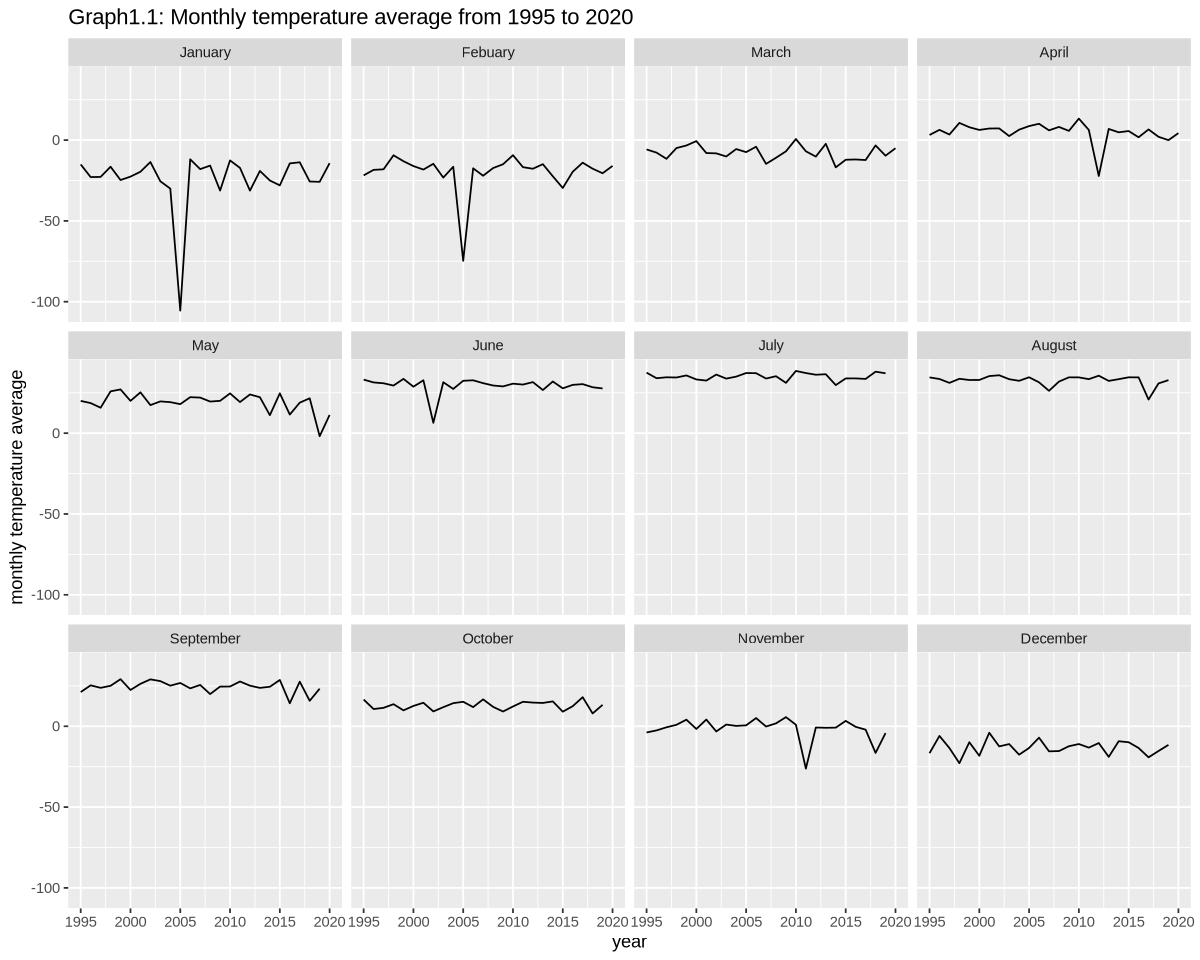

In [26]:
# visualize the monthly change
options(repr.plot.width = 10, repr.plot.height = 8)
month_avg_plot <- month_avg |>             
ggplot(aes(x=Year, y = monthly_avg))+
geom_line(stat = "identity", na.rm = TRUE)+
ggtitle("Graph1.1: Monthly temperature average from 1995 to 2020")+
labs(x="year", y = "monthly temperature average")+
facet_wrap(~Month, labeller = month_labeller)

month_avg_plot

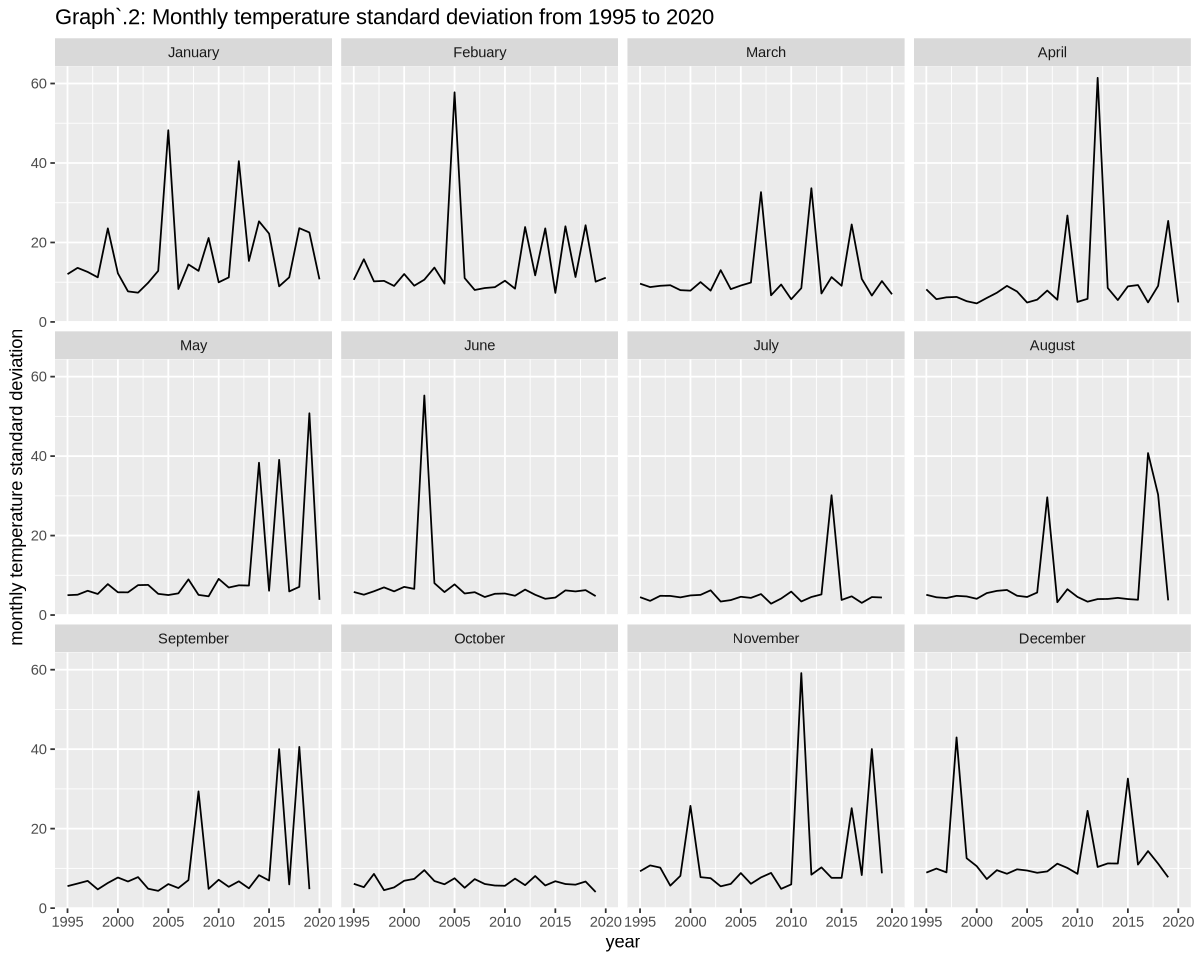

In [27]:
month_sd_plot <- month_avg |>
ggplot(aes(x=Year, y = monthly_sd))+
geom_line(stat = "identity", na.rm = TRUE)+
ggtitle("Graph`.2: Monthly temperature standard deviation from 1995 to 2020")+
labs(x="year", y = "monthly temperature standard deviation")+
facet_wrap(~Month, labeller = month_labeller)
month_sd_plot

### Part2: Visualize the yearly temperature trend from 1995 to 2020
- `table2.1 - year_avg`: the summary of yearly temperature average and standard deviation grouped by year and month.
- `graph2.1`: yearly temperature average trend
- `graph2.2`: yearly temperature standard deviation trend

In [28]:
year_avg <- temp_canada |>
filter(!is.na(AvgTemperature))|>
mutate(AvgTemperature = f_to_c(AvgTemperature))|>
group_by(Year)|>
summarize(yearly_avg = mean(AvgTemperature),
         yearly_sd = sd(AvgTemperature))
head(year_avg)

Year,yearly_avg,yearly_sd
<dbl>,<dbl>,<dbl>
1995,10.002219,21.48494
1996,8.175000,23.03250
1997,9.994521,20.66802
1998,11.680904,24.68378
1999,12.194740,20.60632
2000,9.883880,21.36565


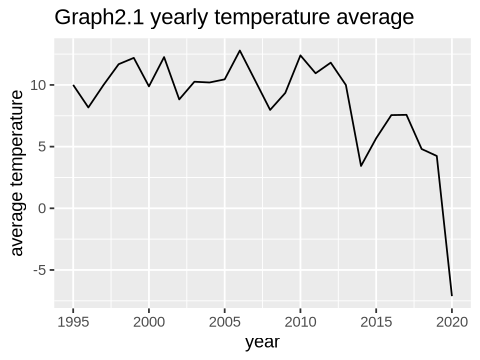

In [29]:
options(repr.plot.width = 4, repr.plot.height = 3)
year_avg_plot <- year_avg |>
ggplot(aes(x= Year, y = yearly_avg))+
geom_line()+
ggtitle("Graph2.1 yearly temperature average")+
labs(x = "year", y = "average temperature")
year_avg_plot

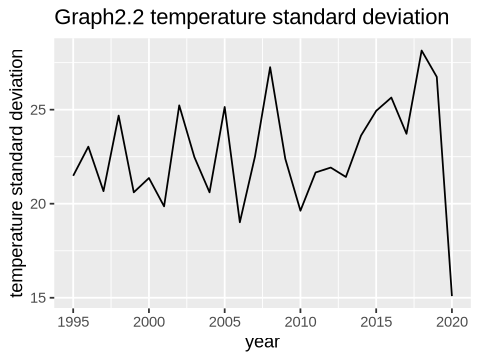

In [30]:
options(repr.plot.width = 4, repr.plot.height = 3)
year_avg_plot <- year_avg |>
ggplot(aes(x= Year, y = yearly_sd))+
geom_line()+
ggtitle("Graph2.2 temperature standard deviation")+
labs(x = "year", y = "temperature standard deviation")
year_avg_plot

### Part3: Visualize the difference between temperature in 1995 to 2020
Purpose: find out if the difference is normally distributed or not
- `table3.1`: the table containing the difference between temperature from 2020 and 1995
- `graph3.1`: the plot of distribution of temperature difference

In [31]:
# head(temp_canada)
temp_diff <- temp_quebec |>
filter(Year == 1995 | Year == 2019) |>
pivot_wider(names_from = Year, values_from = AvgTemperature)|>
filter(!is.na(`2019`)) |>
filter(!is.na(`1995`)) |>
mutate(diff = `2019`-`1995`)
head(temp_diff)

City,Month,Day,1995,2019,diff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Quebec,1,1,18.0,26.9,8.9
Quebec,1,2,21.7,-2.0,-23.7
Quebec,1,3,14.5,5.3,-9.2
Quebec,1,4,13.2,21.8,8.6
Quebec,1,5,-1.1,33.0,34.1
Quebec,1,6,20.3,26.0,5.7


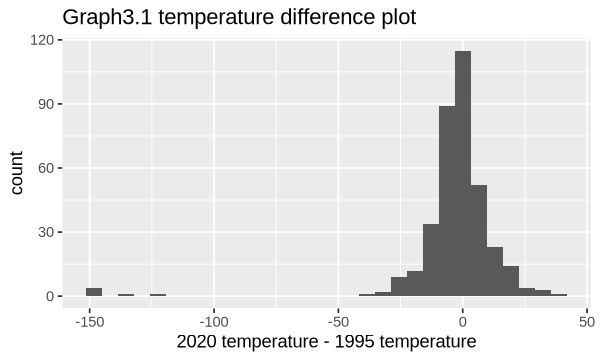

In [32]:
options(repr.plot.width = 5)
diff_plot <- temp_diff |>
ggplot()+
geom_histogram(aes(x=diff), bins = 30)+
ggtitle("Graph3.1 temperature difference plot")+
labs(x = "2020 temperature - 1995 temperature")
diff_plot

### Methods: Plan
Our report delves into a 24-year timeline, stretching from 1995 to 2019, offering an in-depth examination of long-term temperature trends and climatic patterns in Canada. By dissecting the data into monthly averages and deviations, the report provides a detailed analysis of seasonal fluctuations and irregularities, offering a more precise understanding than an annual overview.
While the report's graphs highlight temperature trends, they lack the statistical substantiation needed for definitive conclusions. The inclusion of statistical evidence, particularly confidence intervals, would increase the reliability of the report.
To statistically test whether temperatures are increasing in Canada from 1995 to 2019, a hypothesis test can be conducted.

$\bar{x_0}$: Quebec's temperature in 1995.
$\bar{x_1}$: Quebec's temperature in 2019.
- `Null Hypothesis`$H_0 : \bar{x_0}- \bar{x_1} = 0$
    - There is no increase in the average seasonal temperatures in Canada between 1995 and 2019.
- `Alternative Hypothesis`$H_a : \bar{x_0} - \bar{x_1} < 0$
    - There is an increase in the average seasonal temperatures in Canada between 1995 and 2019.

To test if our hypothesis holds, we will use the dependent two-sample paired t-test. According to Graph 3.1 in the preliminary result, the distribution of the temperature difference between 2019 and 1995 is roughly normally distributed. Therefore, we will use the t-distribution of sample size -1 degree of freedom to evaluate the H0. By calculating the z-score and getting the p-value accordingly, we can determine if we should reject the null hypothesis or not.

To test if different patterns can be found in different seasons, we will conduct 4 comparison between the temperature.

In conclusion, we aimed to use datasets of temperatures in various nations to address the topic of whether temperatures rose in Canada between 1995 and 2020. We use climate change in Canada as a model to consider future action that has to be made to solve the issue. Climate change will have an impact on every facet of our existence, including agriculture and human health (Hardy, J. T., 2003).

### Hypothesis Test

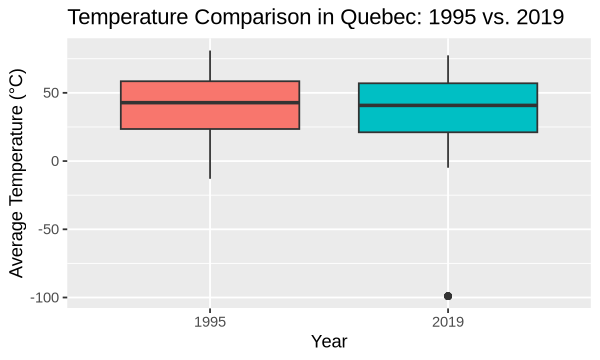

In [35]:
temp_boxplots <- temp_quebec %>%
    filter(Year == 1995 | Year == 2019) %>%
    ggplot(aes(x = factor(Year), y = AvgTemperature, fill = factor(Year))) +
    geom_boxplot() +
    theme(text = element_text(size = 11)) +
    ggtitle("Temperature Comparison in Quebec: 1995 vs. 2019") + 
    xlab("Year") + 
    ylab("Average Temperature (°C)") + 
    guides(fill = FALSE)
temp_boxplots

In [36]:
temp_quebec_summary <- temp_quebec %>%
    filter(Year == 1995 | Year == 2019) %>% 
    group_by(Year) %>% 
    summarise(
        sample_mean = mean(AvgTemperature, na.rm = TRUE), 
        sample_var = var(AvgTemperature, na.rm = TRUE), 
        n = n()
    )

head(temp_quebec_summary)


Year,sample_mean,sample_var,n
<dbl>,<dbl>,<dbl>,<int>
1995,40.75726,474.0053,365
2019,37.17288,755.5558,365


In [38]:
test_statistic <- 
  (temp_quebec_summary$sample_mean[2] - temp_quebec_summary$sample_mean[1]) / 
  sqrt(temp_quebec_summary$sample_var[2] / temp_quebec_summary$n[2] + 
       temp_quebec_summary$sample_var[1] / temp_quebec_summary$n[1])

test_statistic

[1] -1.952926

In [42]:
df <- sum(temp_quebec_summary$n) - 2
p_value_one_tail <- pt(-abs(test_statistic), df = df)

p_value_one_tail

[1] 0.02560556

In [45]:
temp_quebec_filtered <- temp_quebec %>%
  filter(!is.na(AvgTemperature), Year %in% c(1995, 2019))

# Performing the t-test
t_test_result <- t.test(
  x = temp_quebec_filtered$AvgTemperature[temp_quebec_filtered$Year == 1995],
  y = temp_quebec_filtered$AvgTemperature[temp_quebec_filtered$Year == 2019],
  alternative = "greater"
)

# Extracting the results of the t-test in a tidy format
t_test_stats <- broom::tidy(t_test_result)

t_test_stats

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3.584384,40.75726,37.17288,1.952926,0.0256156,691.7299,0.5613853,Inf,Welch Two Sample t-test,greater


## Reference
Alexander, L. V.  (2013). Climate Change: The Physical Science Basis. Cambridge University Press.

Hardy, J. T. (2003). Climate change: causes, effects, and solutions. John Wiley & Sons.

Vincent, L. A., W. A. van Wijngaarden, R. Hopkinson. (2007). Surface temperature and humidity trends in Canada for 1953–2005. J Climate.
